<a href="https://colab.research.google.com/github/Vincenzo-Miracula/MasterSDS/blob/main/bluesky_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

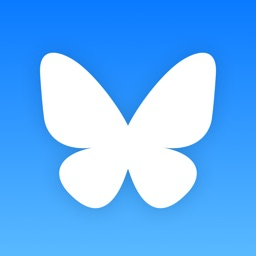

# Spiegazione del Codice Python per l'Estrazione di Post da Bluesky

### Introduzione
Il codice fornisce un esempio di come interagire con l'API di Bluesky (un social network decentralizzato) per estrarre i post da un feed utilizzando la libreria Python `atproto`. Il processo comprende l'autenticazione, la ricerca di post, e l'estrazione di informazioni sui post (come l'autore, il testo, e la data). I dati vengono poi organizzati in un DataFrame di Pandas per un'analisi successiva.

### Installazione e Importazione delle Librerie
Il codice inizia con l'installazione e l'importazione delle librerie necessarie:

- `atproto`: Libreria utilizzata per interagire con l'API di Bluesky.
- `requests`: Per inviare richieste HTTP.
- `json`: Per lavorare con risposte in formato JSON.
- `tqdm`: Per visualizzare una barra di avanzamento durante l'esecuzione dei loop.
- `time`: Per gestire pause tra le richieste.
- `pandas`: Per la manipolazione dei dati.
- `configparser`: Per leggere il file di configurazione.
- `datetime`: Per lavorare con date e orari.

### Lettura delle Credenziali
Il codice utilizza il modulo `configparser` per leggere le credenziali di accesso da un file `config.ini`.

### Autenticazione e Login
Le credenziali vengono utilizzate per effettuare il login su Bluesky tramite il metodo `login` della classe `Client`. Tuttavia, il `token` di autenticazione è vuoto nel codice, il che significa che deve essere riempito per funzionare correttamente.

### Preparazione della Richiesta API
L'endpoint dell'API di Bluesky per cercare i post è specificato nell'URL. Inoltre, vengono impostati i parametri della ricerca, come la query, il limite dei post da estrarre, l'ordinamento, e il tag per la ricerca.

### Funzione per Estrazione dei Post
La funzione `estrai_post` invia richieste API per ottenere i post da Bluesky. Utilizza la paginazione tramite un cursore per recuperare più post, se necessario. Inoltre, viene utilizzata la libreria `tqdm` per visualizzare una barra di avanzamento durante l'estrazione dei dati.

### Estrazione delle Informazioni dai Post
Una volta estratti i post, la funzione `estrai_displaynames_e_testi` raccoglie informazioni specifiche da ogni post, come l'handle dell'autore, il nome visualizzato, il testo del post, e la data di creazione.

### Creazione del DataFrame con Pandas
Infine, i dati estratti vengono convertiti in un DataFrame di Pandas per facilitare la visualizzazione e l'analisi. Ogni post è rappresentato da una riga nel DataFrame con le colonne `Author`, `Username`, `Text`, e `Date`.


In [ ]:
!pip install atproto

In [2]:
from atproto import Client
import requests
import json
from tqdm import tqdm
import time
import pandas as pd
import configparser
from datetime import datetime

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [4]:
client = Client()
# By default, it uses the server of bsky.app. To change this behavior, pass the base api URL to constructor
client_id = config['bluesky']['client_id']
password_app = config['bluesky']['password_app']

client.login(client_id, password_app)

ProfileViewDetailed(did='did:plc:ivfu5nvijjj3ebhiro3v63nd', handle='mrkochon.bsky.social', associated=ProfileAssociated(chat=None, feedgens=0, labeler=False, lists=0, starter_packs=0, py_type='app.bsky.actor.defs#profileAssociated'), avatar='https://cdn.bsky.app/img/avatar/plain/did:plc:ivfu5nvijjj3ebhiro3v63nd/bafkreifojracftpjzkgvxob4wumyaepm54uovlum6png6espqpo2fhe4bm@jpeg', banner=None, created_at='2024-12-19T16:34:25.743Z', description=None, display_name='', followers_count=2, follows_count=1, indexed_at='2024-12-19T16:34:25.743Z', joined_via_starter_pack=None, labels=[], pinned_post=None, posts_count=0, viewer=ViewerState(blocked_by=False, blocking=None, blocking_by_list=None, followed_by=None, following=None, known_followers=None, muted=False, muted_by_list=None, py_type='app.bsky.actor.defs#viewerState'), py_type='app.bsky.actor.defs#profileViewDetailed')

In [160]:
params = {
    "q": "Cecilia Sala Meloni",    # Search query
    "limit": 100,           # Maximum limit per request (API supports up to 100)
    "lang": "it",           # Language of the results
    "sort": "latest",       # Sorting order for the results (latest or top)
    "tags": ["meloni"],        # Filter by tag
    'since': "2024-12-14T00:00:00Z",  # Start date and time in ISO 8601 format
    'until': "2025-01-14T00:00:00Z"   # End date and time in ISO 8601 format
}

In [161]:
# Variables to track posts and total count
data = []
total_posts = 2000  # Total number of posts we want to fetch
cursor = 0  # Initialize cursor for pagination

while len(data) < total_posts:
    if cursor:
        params["cursor"] = cursor  # Add the cursor for pagination

    # Make the API request to fetch posts
    resp = client.app.bsky.feed.search_posts(params)

    # Check if the response has "posts" and "cursor" attributes
    posts = resp.posts  # This depends on the structure of the "resp" object
    data.extend(posts)  # Add posts to the list

    # Check if a cursor exists to load more posts
    cursor = resp.cursor if hasattr(resp, 'cursor') else None

    # If there's no more cursor, break the loop
    if not cursor:
        break

# Now "data" contains the first 5 posts (or fewer if there aren't enough results)
print(f"Total posts downloaded: {len(data)}")

Total posts downloaded: 190


In [138]:
data

[PostView(author=ProfileViewBasic(did='did:plc:vmreizcjreooxecmzwzmcqeb', handle='lucianaborsatti.bsky.social', associated=None, avatar='https://cdn.bsky.app/img/avatar/plain/did:plc:vmreizcjreooxecmzwzmcqeb/bafkreiapbjsrqet5auxmvtbzuufkezm6n6cc6cywsxh5bc33s5yodt75om@jpeg', created_at='2024-12-19T18:31:39.243Z', display_name='', labels=[], viewer=ViewerState(blocked_by=False, blocking=None, blocking_by_list=None, followed_by=None, following=None, known_followers=None, muted=False, muted_by_list=None, py_type='app.bsky.actor.defs#viewerState'), py_type='app.bsky.actor.defs#profileViewBasic'), cid='bafyreice2hewqf3qpdy72u46vhhdsvdq2zjqffqsdgqvg3rbvwihjt2qfe', indexed_at='2025-01-13T21:32:50.351Z', record=Record(created_at='2025-01-13T21:32:46.533Z', text="My latest per @valigiablu.it. Fra i temi: dopo l'arresto di Cecilia Sala, tornare da giornalisti in Iran? Quale il contesto interno del caso?\n\nPakhshan Azizi e le altre detenute, ma anche i nuovi negoziati con l’Occidente. Dopo Cecili

In [134]:
content = []  # Initialize a list to hold the organized posts

for post in data:
    post_data = {
        "did": post.author.did,                      # Author's DID (identifier)
        "handle": post.author.handle,                # Author's handle
        "display_name": post.author.display_name,    # Author's display name
        "avatar": post.author.avatar,                # Author's avatar
        "text": post.record.text,                    # Post's text content
        "created_at": post.record.created_at,        # Post's creation date
        "uri": post.uri,                             # Post's URI
        "like_count": post.like_count,               # Like count
        "quote_count": post.quote_count,             # Quote count
        "reply_count": post.reply_count,             # Reply count
        "repost_count": post.repost_count            # Repost count
    }
    content.append(post_data)

In [141]:
df = pd.DataFrame(content)
df.to_csv('posts_bluesky.csv', index=False)